Correlation of each feature with 'general satisfaction'
                   correlation
delivery speed        0.650632
price level           0.028395
price flexibility     0.524814
supplier image        0.475934
service               0.631233
sales staff image     0.340909
product quality      -0.283340

Most influential field: 'delivery speed'
Correlation coefficient: 0.6506

Scatter plot with general satisfaction against the most influencial feature ´delivery speed´


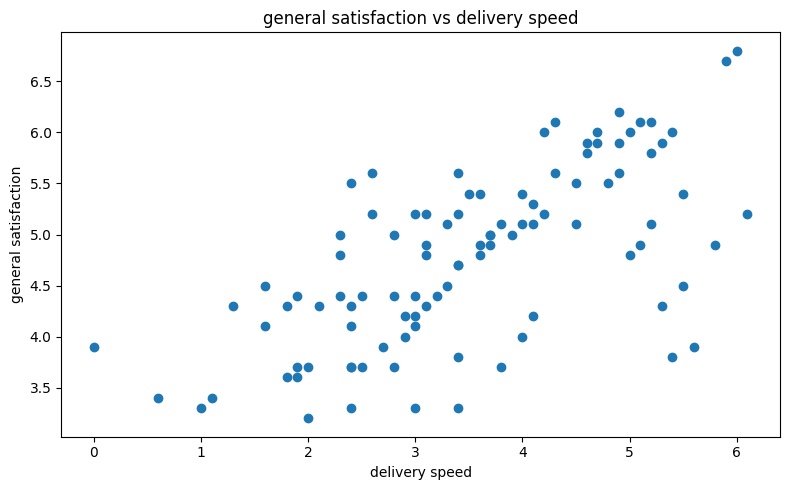


Scatter plot with the actual and predicted general satisfaction values


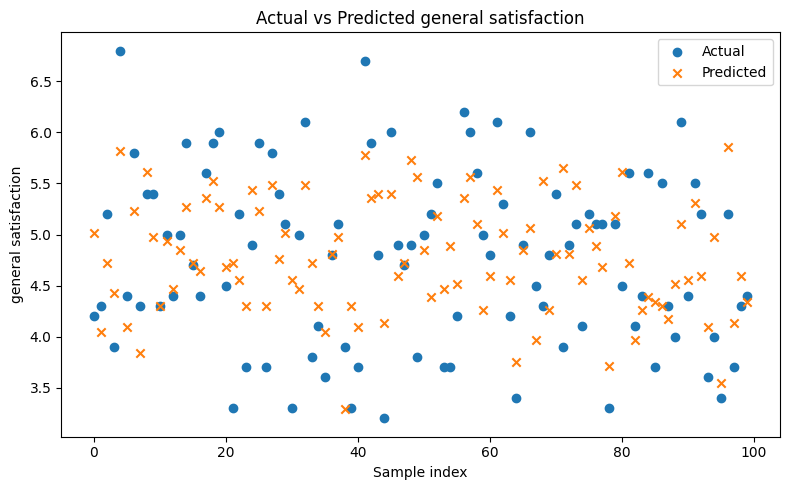

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
# from getpass import getuser

# user = getuser()
# csv_location = f'/home/{user}/dan/private/exrc_05/data/{user}_query.txt'
csv_location = "ah4323_query.txt"
# csv_location =  "FILE_NAME" ### GIVE FILE_NAME TO RUN THE CODE LOCALLY

# Load input CSV data which contains fake customer survey data into pandas.DataFrame
data = pd.read_csv(csv_location)

# # Get basic information about data
# print(data.info()) # prints concise summary about DataFrame's structure
# print(data.head()) # prints first five rows - default

# Separate features and response columns
X = data.iloc[:, :-1] # Features ie extract all the columns except last 
y = data.iloc[:, -1] # Response ei extract last column which is response / target

# Compute correlation coeffiecients of all features vs target
correlation_coefs = X.corrwith(y)

print("Correlation of each feature with 'general satisfaction'")
print(correlation_coefs.to_frame(name="correlation"))

# Identify the most influencial feature based upon correlation coeffiecients value
top_feature = correlation_coefs.abs().sort_values(ascending=False).index[0]
top_corr_value = correlation_coefs[top_feature]

print(f"\nMost influential field: '{top_feature}'")
print(f"Correlation coefficient: {top_corr_value:.4f}")

# Prepare single-feature X and target y
X_1 = X[[top_feature]]
y_1 = y

# Fit model
model = LinearRegression()
model.fit(X_1, y_1)

# Predict on full dataset
y_pred = model.predict(X_1)

# Plot 1: Scatter plot with general satisfaction against the most influencial feature ´delivery speed´
print("\nScatter plot with general satisfaction against the most influencial feature ´delivery speed´")
plt.figure(figsize=(8,5))
plt.scatter(X_1[top_feature], y_1)
plt.xlabel(top_feature)
plt.ylabel("general satisfaction")
plt.title(f"general satisfaction vs {top_feature}")
plt.tight_layout()
plt.show()

# Plot 2: Scatter plot with the "actual" and "predicted" general satisfaction values
print("\nScatter plot with the actual and predicted general satisfaction values")
plt.figure(figsize=(8,5))
idx = np.arange(len(y_1))
plt.scatter(idx, y_1, label="Actual", marker="o")
plt.scatter(idx, y_pred, label="Predicted", marker="x")
plt.xlabel("Sample index")
plt.ylabel("general satisfaction")
plt.title("Actual vs Predicted general satisfaction")
plt.legend()
plt.tight_layout()
plt.show()
